# 2019.11.24. 딥-러닝 과정 CNN

# 네번째 실습. Keras 모델 생성/학습 - cifar10 : CNN
[Keras Dataset](https://keras.io/ko/datasets/#-cifar10)

## 1. 데이터 불러오기


In [1]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                     test_size=0.2,
                                                     random_state=12)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


170500096/170498071 [==============================] - 4s 0us/step
(40000, 32, 32, 3) (40000, 1)
(10000, 32, 32, 3) (10000, 1)
(10000, 32, 32, 3) (10000, 1)


## 2. 이미지 데이터 확인하기 🖼


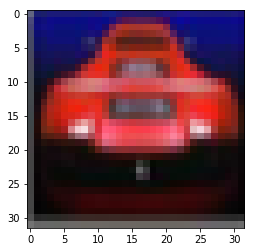

In [3]:
import matplotlib.pyplot as plt

image = X_train[0]

plt.imshow(image)

## 3. 이미지 데이터 전처리 
- reshape 필요 X
- Normalization만 수행

In [4]:
X_train[0]

array([[[ 98, 102, 129],
        [ 25,  29, 111],
        [ 27,  31, 106],
        ...,
        [ 26,  27, 118],
        [ 29,  26, 123],
        [ 27,  20, 122]],

       [[ 75,  74, 122],
        [ 12,  11, 120],
        [ 16,  16, 122],
        ...,
        [ 11,  11, 137],
        [ 13,  10, 141],
        [ 12,   6, 135]],

       [[ 69,  68, 117],
        [ 13,  12, 125],
        [ 18,  16, 130],
        ...,
        [ 11,  15, 129],
        [ 13,  15, 130],
        [ 11,  12, 122]],

       ...,

       [[ 68,  68,  68],
        [  4,   4,   4],
        [  6,   6,   6],
        ...,
        [  8,   7,   7],
        [  6,   6,   6],
        [  3,   3,   3]],

       [[ 80,  80,  80],
        [ 38,  38,  38],
        [ 41,  41,  41],
        ...,
        [ 40,  40,  40],
        [ 39,  39,  39],
        [ 41,  41,  41]],

       [[115, 115, 115],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [103, 103, 103],
        [102, 102, 102],
        [107, 107, 107]]

In [5]:
X_train = X_train/255.0
X_val = X_val/255.5
X_test = X_test/255.0

In [6]:
X_train[0]

array([[[0.38431373, 0.4       , 0.50588235],
        [0.09803922, 0.11372549, 0.43529412],
        [0.10588235, 0.12156863, 0.41568627],
        ...,
        [0.10196078, 0.10588235, 0.4627451 ],
        [0.11372549, 0.10196078, 0.48235294],
        [0.10588235, 0.07843137, 0.47843137]],

       [[0.29411765, 0.29019608, 0.47843137],
        [0.04705882, 0.04313725, 0.47058824],
        [0.0627451 , 0.0627451 , 0.47843137],
        ...,
        [0.04313725, 0.04313725, 0.5372549 ],
        [0.05098039, 0.03921569, 0.55294118],
        [0.04705882, 0.02352941, 0.52941176]],

       [[0.27058824, 0.26666667, 0.45882353],
        [0.05098039, 0.04705882, 0.49019608],
        [0.07058824, 0.0627451 , 0.50980392],
        ...,
        [0.04313725, 0.05882353, 0.50588235],
        [0.05098039, 0.05882353, 0.50980392],
        [0.04313725, 0.04705882, 0.47843137]],

       ...,

       [[0.26666667, 0.26666667, 0.26666667],
        [0.01568627, 0.01568627, 0.01568627],
        [0.02352941, 0

## 4. Label categorical (one-hot encoding) 


In [7]:
print(y_train[:10])

[[1]
 [7]
 [0]
 [9]
 [1]
 [4]
 [9]
 [5]
 [1]
 [9]]


In [8]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train[:10])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 5. 모델 생성 : CNN


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(filters=64,
                kernel_size=(3, 3), 
                padding='same',
                activation='relu',
                input_shape=(32, 32, 3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2097280   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,100,362
Trainable params: 2,100,362
Non-trainable params: 0
_________________________________________________________________
None


## 6. Compile - Optimizer, Loss function 설정


In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## 7. 모델 학습시키기


In [11]:
batch_size = 128
epochs = 50

hist = model.fit(X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(X_val, y_val),
                verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 36s 890us/step - loss: 1.5589 - acc: 0.4481 - val_loss: 1.3041 - val_acc: 0.5444
Epoch 2/50
40000/40000 [==============================] - 4s 100us/step - loss: 1.2196 - acc: 0.5702 - val_loss: 1.2007 - val_acc: 0.5791
Epoch 3/50
40000/40000 [==============================] - 4s 100us/step - loss: 1.0949 - acc: 0.6181 - val_loss: 1.1305 - val_acc: 0.6138
Epoch 4/50
40000/40000 [==============================] - 4s 100us/step - loss: 1.0019 - acc: 0.6498 - val_loss: 1.1291 - val_acc: 0.6089
Epoch 5/50
40000/40000 [==============================] - 4s 100us/step - loss: 0.9226 - acc: 0.6795 - val_loss: 1.0619 - val_acc: 0.6273
Epoch 6/50
40000/40000 [==============================] - 4s 100us/step - loss: 0.8583 - acc: 0.7014 - val_loss: 1.0648 - val_acc: 0.6353
Epoch 7/50
40000/40000 [==============================] - 4s 100us/step -

## 8. 모델 평가하기


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(test_loss, test_acc)

10000/10000 [==============================] - 1s 69us/step
2.566985604476929 0.6421


## 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼


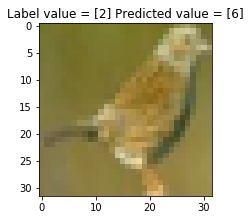

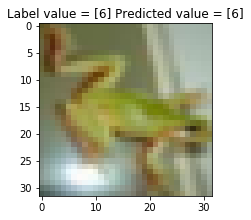

In [16]:
import numpy as np

for index in np.random.choice(len(y_test), 2, replace=False):
    label = y_test[index]
    res_label = np.where(label == np.amax(label))
    
    pred = model.predict(X_test[index:index+1])[0]
    res_pred = np.where(pred == np.amax(pred))
    
    title = 'Label value = %s Predicted value = %s' % (res_label[0], res_pred[0])
    fig = plt.figure(1, figsize=(3,3))
    ax1 = fig.add_axes((0, 0, 0.8, 0.8))
    ax1.set_title(title)
    
    images = X_test
    plt.imshow(images[index], cmap='Greys', interpolation='nearest')
    plt.show()

## 10. 학습 시각화하기


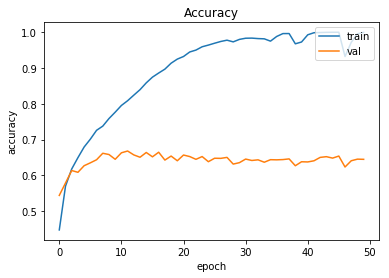

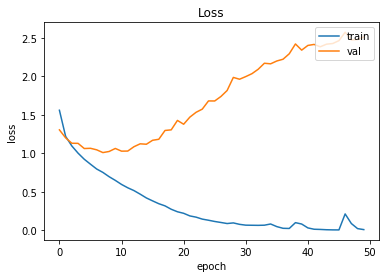

In [14]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

수고하셨습니다 👍